In [2]:
import pandas as pd
import numpy as np
from datasets import load_metric
import evaluate

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
rouge_metric = load_metric('rouge')

import warnings
warnings.filterwarnings("ignore")

C:\Users\Dell\AppData\Local\Temp\ipykernel_13724\1186873666.py:8: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\datasets\load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


# Analysis of Extractive Text Summarization

### ROUGE Score computation

In [3]:
# Load the extractive text summaries (saved earlier)
df = pd.read_csv('./output/ext-ts-final.csv')


In [4]:
df.tail(3)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-ext,bert-base-ext-zs,t5-small-ext-zs,gpt-3.5-ext-zs,gpt-4-ext-zs,bert-base-ext-ft,gpt35-ext-ft,gpt40-ext-ft
97,97,97,3815d19af18ff22be6ad6095722d7367bb7271af,"Christopher Bridger, 25, attacked three women ...",A paramedic who pretended he was gay to get cl...,A paramedic who pretended he was gay to get cl...,A paramedic who pretended he was gay to get cl...,"Christopher Bridger 25, from Stevenage Hertfor...","Christopher Bridger, a former paramedic who wa...","Christopher Bridger, a 25-year-old former para...",christopher bridger 25 attacked three women af...,"Christopher Bridger, a paramedic from Stevenag...",NaN
98,98,98,fb207604ffa7e8371c622840445825db8993d4d2,Paris Saint-Germain captain Thiago Silva suffe...,Paris Saint Germain face Nice on Saturday hopi...,Paris Saint Germain face Nice on Saturday hopi...,Paris Saint Germain face Nice on Saturday hopi...,Thiago Silva is recovering at home from a thig...,Paris Saint Germain will face Nice without sev...,Paris Saint Germain (PSG) aims to take the top...,thiago silva is recuperating at home from a th...,Paris Saint Germain will face Nice without cap...,Paris Saint Germain face Nice on Saturday hopi...
99,99,99,d25d52c434a13c1df5faa593e8a097d2f501a2b6,.50-caliber bullets equipped with optical sens...,CNN You know the phrase dodging a bullet Forge...,CNN You know the phrase dodging a bullet Forge...,CNN You know the phrase dodging a bullet Forge...,the smart bullets .50 caliber projectiles pass...,The U.S. military has made significant progres...,"The U.S. military, according to DARPA, has adv...",the u. s. military has made great progress in ...,The US military has made progress in developin...,```\nThe U.S. military said this week it has m...


In [5]:
print(len(df))

100


In [6]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

models = ['baseline-ext', 
          'bert-base-ext-zs',
          't5-small-ext-zs', 
          'gpt-3.5-ext-zs',
          'gpt-4-ext-zs', 
          "bert-base-ext-ft",
          'gpt35-ext-ft',
          'gpt40-ext-ft']

records = []

for model_name in models:
    rouge_metric.add(prediction = df[model_name], reference = df['highlights'])
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

metrics_df = pd.DataFrame.from_records(records, index = models )
metrics_df

rouge_dict  {'rouge1': 0.469362957819823, 'rouge2': 0.20265030958856547, 'rougeL': 0.22299369322455592, 'rougeLsum': 0.22299369322455592}
rouge_dict  {'rouge1': 0.4077207826546801, 'rouge2': 0.15337423312883436, 'rougeL': 0.175251189846642, 'rougeLsum': 0.175251189846642}
rouge_dict  {'rouge1': 0.6173370177054549, 'rouge2': 0.2075954550107483, 'rougeL': 0.2466482448060587, 'rougeLsum': 0.2466482448060587}
rouge_dict  {'rouge1': 0.4842050413599948, 'rouge2': 0.17223633639502314, 'rougeL': 0.2059532338956556, 'rougeLsum': 0.2059532338956556}
rouge_dict  {'rouge1': 0.4119874855919644, 'rouge2': 0.1381127518252182, 'rougeL': 0.16883473297107413, 'rougeLsum': 0.16883473297107413}
rouge_dict  {'rouge1': 0.6175585741635519, 'rouge2': 0.22978024984043038, 'rougeL': 0.2689397392652019, 'rougeLsum': 0.2689397392652019}
rouge_dict  {'rouge1': 0.6064053940160135, 'rouge2': 0.20674394099051635, 'rougeL': 0.24631268436578171, 'rougeLsum': 0.24631268436578171}
rouge_dict  {'rouge1': 0.566098572086596

,rouge1,rouge2,rougeL,rougeLsum
baseline-ext,0.469363,0.202650,0.222994,0.222994
bert-base-ext-zs,0.407721,0.153374,0.175251,0.175251
t5-small-ext-zs,0.617337,0.207595,0.246648,0.246648
gpt-3.5-ext-zs,0.484205,0.172236,0.205953,0.205953
gpt-4-ext-zs,0.411987,0.138113,0.168835,0.168835
bert-base-ext-ft,0.617559,0.229780,0.268940,0.268940
gpt35-ext-ft,0.606405,0.206744,0.246313,0.246313
gpt40-ext-ft,0.566099,0.179452,0.206587,0.206587


### BLEU Score computation

In [7]:
scores = []
sacrebleu = load_metric('sacrebleu')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = sacrebleu.compute(predictions=[predictions], references=[references])
    scores.append(result['score'])

metrics_df['sacrebleu'] = scores
metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu
baseline-ext,0.469363,0.202650,0.222994,0.222994,6.579425
bert-base-ext-zs,0.407721,0.153374,0.175251,0.175251,4.713108
t5-small-ext-zs,0.617337,0.207595,0.246648,0.246648,9.238804
gpt-3.5-ext-zs,0.484205,0.172236,0.205953,0.205953,5.867918
gpt-4-ext-zs,0.411987,0.138113,0.168835,0.168835,4.184593
bert-base-ext-ft,0.617559,0.229780,0.268940,0.268940,7.060130
gpt35-ext-ft,0.606405,0.206744,0.246313,0.246313,11.129132
gpt40-ext-ft,0.566099,0.179452,0.206587,0.206587,8.968705


### METEOR Score computation

In [8]:
scores = []
meteor = load_metric('meteor')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    score = meteor.compute(predictions=predictions, references=references)
    scores.append(score['meteor'])

metrics_df['meteor'] = scores
metrics_df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor
baseline-ext,0.469363,0.202650,0.222994,0.222994,6.579425,0.406537
bert-base-ext-zs,0.407721,0.153374,0.175251,0.175251,4.713108,0.324897
t5-small-ext-zs,0.617337,0.207595,0.246648,0.246648,9.238804,0.257793
gpt-3.5-ext-zs,0.484205,0.172236,0.205953,0.205953,5.867918,0.332961
gpt-4-ext-zs,0.411987,0.138113,0.168835,0.168835,4.184593,0.316174
bert-base-ext-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588
gpt35-ext-ft,0.606405,0.206744,0.246313,0.246313,11.129132,0.296208
gpt40-ext-ft,0.566099,0.179452,0.206587,0.206587,8.968705,0.209802


### BERTScore computation

In [9]:
import numpy as np

In [10]:
bertscore_precision = []
bertscore_recall = []
bertscore_F1 = []


bertscore = load_metric('bertscore')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = bertscore.compute(predictions=predictions, references=references, lang="en", model_type="distilbert-base-uncased")
    #print(np.mean(result['precision']))
    
    #print(result)
    bertscore_precision.append(np.mean(result['precision']))
    bertscore_recall.append(np.mean(result['recall']))
    bertscore_F1.append(np.mean(result['f1']))
        
metrics_df['bertscore_precision'] = bertscore_precision
metrics_df['bertscore_recall'] = bertscore_recall
metrics_df['bertscore_F1'] = bertscore_F1

metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
baseline-ext,0.469363,0.202650,0.222994,0.222994,6.579425,0.406537,0.782609,0.839623,0.809781
bert-base-ext-zs,0.407721,0.153374,0.175251,0.175251,4.713108,0.324897,0.767215,0.821567,0.793010
t5-small-ext-zs,0.617337,0.207595,0.246648,0.246648,9.238804,0.257793,0.800429,0.800403,0.800102
gpt-3.5-ext-zs,0.484205,0.172236,0.205953,0.205953,5.867918,0.332961,0.764704,0.812047,0.786761
gpt-4-ext-zs,0.411987,0.138113,0.168835,0.168835,4.184593,0.316174,0.749642,0.812079,0.778603
bert-base-ext-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588,0.815150,0.828461,0.821388
gpt35-ext-ft,0.606405,0.206744,0.246313,0.246313,11.129132,0.296208,0.798701,0.788310,0.792843
gpt40-ext-ft,0.566099,0.179452,0.206587,0.206587,8.968705,0.209802,0.742119,0.731454,0.735748


In [11]:
file_path = './output/ext_ts_eval_metrics_final.csv'
print("Evaluation will be saved in this file : ", file_path)
metrics_df.to_csv(file_path)

Evaluation will be saved in this file :  ./output/ext_ts_eval_metrics_final.csv


In [12]:
#duration_df

Text(0.5, 1.0, 'Analysis of Extractive Text Summarization Inference Time')

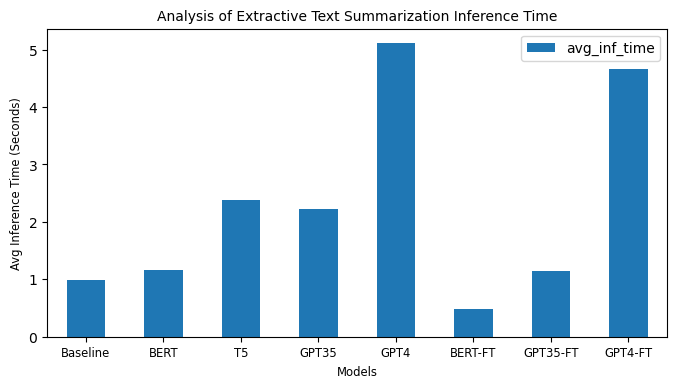

In [13]:
duration_df = pd.read_csv('./output/ext-ts-duration-final.csv')
ax = duration_df.plot(kind = 'bar', x = 'models', y = 'avg_inf_time', figsize=(8,4))
ax.set_xticklabels(labels = duration_df['models'], rotation='horizontal', fontsize='small')
ax.set_xlabel("Models", fontsize='small')
ax.set_ylabel("Avg Inference Time (Seconds)", fontsize='small')
ax.set_title("Analysis of Extractive Text Summarization Inference Time", fontsize='medium')

In [14]:
viz_df = pd.read_csv(file_path)
viz_df.head(10)

,Unnamed: 0,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
0,baseline-ext,0.469363,0.202650,0.222994,0.222994,6.579425,0.406537,0.782609,0.839623,0.809781
1,bert-base-ext-zs,0.407721,0.153374,0.175251,0.175251,4.713108,0.324897,0.767215,0.821567,0.793010
2,t5-small-ext-zs,0.617337,0.207595,0.246648,0.246648,9.238804,0.257793,0.800429,0.800403,0.800102
3,gpt-3.5-ext-zs,0.484205,0.172236,0.205953,0.205953,5.867918,0.332961,0.764704,0.812047,0.786761
4,gpt-4-ext-zs,0.411987,0.138113,0.168835,0.168835,4.184593,0.316174,0.749642,0.812079,0.778603
5,bert-base-ext-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588,0.815150,0.828461,0.821388
6,gpt35-ext-ft,0.606405,0.206744,0.246313,0.246313,11.129132,0.296208,0.798701,0.788310,0.792843
7,gpt40-ext-ft,0.566099,0.179452,0.206587,0.206587,8.968705,0.209802,0.742119,0.731454,0.735748


### Visualization of Metrics

In [15]:
cats = ['Baseline', 'BERT','T5', 'GPT35','GPT4', 'BERT-FT','GPT35-FT','GPT4-FT']

In [16]:
df1 = viz_df[['Unnamed: 0','rouge1', 'rouge2' ,'rougeL']]
df2 = viz_df[['Unnamed: 0','bertscore_precision', 'bertscore_recall' ,'bertscore_F1']]
df3 = viz_df[['Unnamed: 0','sacrebleu']]
df4 = viz_df[['Unnamed: 0','meteor']]

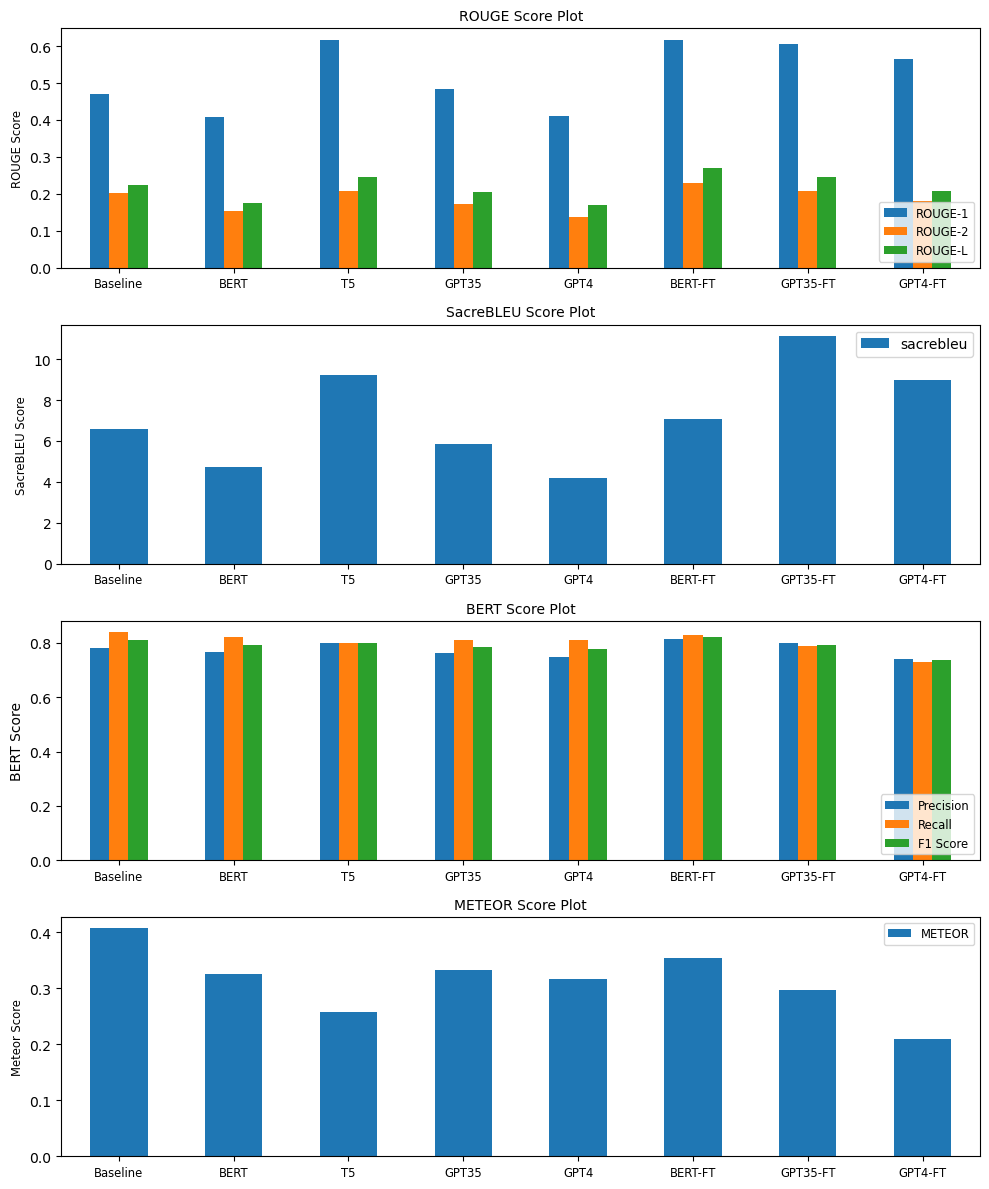

In [17]:
# Creating a 1x4 subplot grid with specified widths
fig, axs = plt.subplots(4, figsize=(10, 12))

# First subplot (row 0, column 0) taking 60% of width
df1.plot(kind='bar', ax = axs[0])
axs[0].set_title('ROUGE Score Plot', fontsize='medium')
axs[0].set_ylabel('ROUGE Score',fontsize='small')
axs[0].legend(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'],fontsize='small', loc = 'lower right')
axs[0].set_xticks([0,1,2,3,4,5,6,7])
axs[0].set_xticklabels(cats, rotation='horizontal', fontsize='small')

# Second subplot (row 0, column 1)
df3.plot(kind='bar', ax = axs[1])
axs[1].set_title('SacreBLEU Score Plot',fontsize='medium')
#axs[1].set_xlabel('Models')
axs[1].set_ylabel('SacreBLEU Score',fontsize='small')
axs[1].set_xticks([0,1,2,3,4,5,6,7])
axs[1].set_xticklabels(cats,rotation='horizontal', fontsize='small')

# Third subplot (row 1, column 0) taking 60% of width
#axs[1, 0].plot(x, y1, color='green')
df2.plot(kind='bar', ax = axs[2])
axs[2].set_title('BERT Score Plot',fontsize='medium')
#axs[2].set_xlabel('Models')
axs[2].set_ylabel('BERT Score')
axs[2].legend(['Precision','Recall','F1 Score'], fontsize='small', loc = 'lower right')
axs[2].set_xticks([0,1,2,3,4,5,6,7])
axs[2].set_xticklabels(cats,rotation='horizontal', fontsize='small')
#loc = 'upper right'
# Fourth subplot (row 1, column 1)
df4.plot(kind='bar', ax = axs[3])
axs[3].set_title('METEOR Score Plot',fontsize='medium')
#axs[3].set_xlabel('Models')
axs[3].set_ylabel('Meteor Score',fontsize='small')
axs[3].set_xticks([0,1,2,3,4,5,6,7])
axs[3].set_xticklabels(cats,rotation='horizontal', fontsize='small')
axs[3].legend(['METEOR'], fontsize='small', loc = 'upper right')
# Adjust layout
plt.tight_layout()

#plt.title("METRICS")
# Show plot
plt.show()

# Analysis of Abstractive Text Summarization

In [18]:
# Load the extractive text summaries (saved earlier)
df = pd.read_csv('./output/abs-ts-final.csv')

In [19]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-abs,bert-base-abs-zs,t5-small-abs-zs,gpt-3.5-abs-zs,gpt-4-abs-zs,bert-base-abs-ft,t5-small-abs-ft,article_len,highlights_len,gpt-3.5-abs-ft,gpt-4-abs-ft
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,police say they are not to be a new police say...,ever noticed how plane seats appear to be gett...,some experts are questioning if shrinking spac...,Experts are concerned that the shrinking space...,Experts are raising concerns that the decreasi...,the dot and faa are happy to set standards for...,A U.S consumer advisory group set up by the De...,374,36,Experts are concerned that the shrinking space...,Experts are warning that the decreasing space ...
1,1,1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,Drunk teenage boy climbed into lion enclosure ...,A drunk teenage boy had to be rescued by secur...,police say they are not to be a new york polic...,a drunk teenage boy had to be rescued by secur...,Rahul Kumar 17 climbed into the enclosure fenc...,NaN,"Rahul Kumar, a 17-year-old intoxicated teenage...",rahul kumar 17 climbed into the enclosure fenc...,Rahul Kumar 17 climbed into a lions enclosure ...,317,38,NaN,"A drunk teenager, Rahul Kumar, 17, jumped into..."
2,2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Nottingham Forest are close to extending Dougi...,Dougie Freedman is on the verge of agreeing a ...,the new york s office says the new york is the...,dougie freedman is on the verge of agreeing a ...,Dougie Freedman is set to sign a new two year ...,Dougie Freedman is close to signing a new two-...,Dougie Freedman is close to signing a new two-...,dougie freedman is set to sign a new two year ...,Dougie Freedman is set to sign a new two year ...,114,35,"Nottingham Forest's manager, Dougie Freedman, ...",Dougie Freedman is close to signing a new two-...


### ROUGE Score computation

In [20]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

models = ['baseline-abs', 
          'bert-base-abs-zs',
          't5-small-abs-zs', 
          'gpt-3.5-abs-zs',
          'gpt-4-abs-zs', 
          "bert-base-abs-ft",
          "t5-small-abs-ft",
          'gpt-3.5-abs-ft',
          'gpt-4-abs-ft']

records = []

for model_name in models:
    rouge_metric.add(prediction = df[model_name], reference = df['highlights'])
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].high.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

metrics_df = pd.DataFrame.from_records(records, index = models )
metrics_df

rouge_dict  {'rouge1': 0.20894503243427792, 'rouge2': 0.030051223676721684, 'rougeL': 0.12199840673722546, 'rougeLsum': 0.12199840673722546}
rouge_dict  {'rouge1': 0.42268715266426937, 'rouge2': 0.16902789886660854, 'rougeL': 0.1882968290290945, 'rougeLsum': 0.1882968290290945}
rouge_dict  {'rouge1': 0.6170037144036318, 'rouge2': 0.20949432404540763, 'rougeL': 0.2480396203054065, 'rougeLsum': 0.2480396203054065}
rouge_dict  {'rouge1': 0.6017265266972184, 'rouge2': 0.21021213090288882, 'rougeL': 0.24192688905467333, 'rougeLsum': 0.24192688905467333}
rouge_dict  {'rouge1': 0.564997804128239, 'rouge2': 0.17395124094003955, 'rougeL': 0.220245937637242, 'rougeLsum': 0.220245937637242}
rouge_dict  {'rouge1': 0.6175585741635519, 'rouge2': 0.22978024984043038, 'rougeL': 0.2689397392652019, 'rougeLsum': 0.2689397392652019}
rouge_dict  {'rouge1': 0.6157056145675265, 'rouge2': 0.22158983115158415, 'rougeL': 0.26820940819423367, 'rougeLsum': 0.26820940819423367}
rouge_dict  {'rouge1': 0.6046261430

,rouge1,rouge2,rougeL,rougeLsum
baseline-abs,0.208945,0.030051,0.121998,0.121998
bert-base-abs-zs,0.422687,0.169028,0.188297,0.188297
t5-small-abs-zs,0.617004,0.209494,0.248040,0.248040
gpt-3.5-abs-zs,0.601727,0.210212,0.241927,0.241927
gpt-4-abs-zs,0.564998,0.173951,0.220246,0.220246
bert-base-abs-ft,0.617559,0.229780,0.268940,0.268940
t5-small-abs-ft,0.615706,0.221590,0.268209,0.268209
gpt-3.5-abs-ft,0.604626,0.205961,0.239268,0.239268
gpt-4-abs-ft,0.562147,0.166703,0.212299,0.212299


### BLEU Score computation

In [21]:
scores = []
sacrebleu = load_metric('sacrebleu')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = sacrebleu.compute(predictions=[predictions], references=[references])
    scores.append(result['score'])

metrics_df['sacrebleu'] = scores
metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu
baseline-abs,0.208945,0.030051,0.121998,0.121998,0.395355
bert-base-abs-zs,0.422687,0.169028,0.188297,0.188297,2.960795
t5-small-abs-zs,0.617004,0.209494,0.248040,0.248040,9.411781
gpt-3.5-abs-zs,0.601727,0.210212,0.241927,0.241927,11.482069
gpt-4-abs-zs,0.564998,0.173951,0.220246,0.220246,9.407734
bert-base-abs-ft,0.617559,0.229780,0.268940,0.268940,7.060130
t5-small-abs-ft,0.615706,0.221590,0.268209,0.268209,10.625307
gpt-3.5-abs-ft,0.604626,0.205961,0.239268,0.239268,11.204806
gpt-4-abs-ft,0.562147,0.166703,0.212299,0.212299,7.853371


### METEOR Score computation

In [22]:
scores = []
meteor = load_metric('meteor')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    score = meteor.compute(predictions=predictions, references=references)
    scores.append(score['meteor'])

metrics_df['meteor'] = scores
metrics_df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor
baseline-abs,0.208945,0.030051,0.121998,0.121998,0.395355,0.050284
bert-base-abs-zs,0.422687,0.169028,0.188297,0.188297,2.960795,0.332223
t5-small-abs-zs,0.617004,0.209494,0.248040,0.248040,9.411781,0.257914
gpt-3.5-abs-zs,0.601727,0.210212,0.241927,0.241927,11.482069,0.288816
gpt-4-abs-zs,0.564998,0.173951,0.220246,0.220246,9.407734,0.252180
bert-base-abs-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588
t5-small-abs-ft,0.615706,0.221590,0.268209,0.268209,10.625307,0.336868
gpt-3.5-abs-ft,0.604626,0.205961,0.239268,0.239268,11.204806,0.286299
gpt-4-abs-ft,0.562147,0.166703,0.212299,0.212299,7.853371,0.251420


### BERTScore computation

In [23]:
bertscore_precision = []
bertscore_recall = []
bertscore_F1 = []


bertscore = load_metric('bertscore')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = bertscore.compute(predictions=predictions, references=references, lang="en", 
                               model_type="distilbert-base-uncased")
    bertscore_precision.append(np.mean(result['precision']))
    bertscore_recall.append(np.mean(result['recall']))
    bertscore_F1.append(np.mean(result['f1']))
        
metrics_df['bertscore_precision'] = bertscore_precision
metrics_df['bertscore_recall'] = bertscore_recall
metrics_df['bertscore_F1'] = bertscore_F1

metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
baseline-abs,0.208945,0.030051,0.121998,0.121998,0.395355,0.050284,0.665496,0.644331,0.654606
bert-base-abs-zs,0.422687,0.169028,0.188297,0.188297,2.960795,0.332223,0.714070,0.826855,0.765737
t5-small-abs-zs,0.617004,0.209494,0.248040,0.248040,9.411781,0.257914,0.801183,0.800225,0.800387
gpt-3.5-abs-zs,0.601727,0.210212,0.241927,0.241927,11.482069,0.288816,0.796604,0.784998,0.790122
gpt-4-abs-zs,0.564998,0.173951,0.220246,0.220246,9.407734,0.252180,0.784203,0.776363,0.779572
bert-base-abs-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588,0.815150,0.828461,0.821388
t5-small-abs-ft,0.615706,0.221590,0.268209,0.268209,10.625307,0.336868,0.815280,0.820871,0.817652
gpt-3.5-abs-ft,0.604626,0.205961,0.239268,0.239268,11.204806,0.286299,0.793312,0.781033,0.786428
gpt-4-abs-ft,0.562147,0.166703,0.212299,0.212299,7.853371,0.251420,0.784920,0.778243,0.780958


In [24]:
file_path = './output/abs_ts_eval_metrics_final.csv'
print("Evaluation will be saved in this file : ", file_path)
metrics_df.to_csv(file_path)

Evaluation will be saved in this file :  ./output/abs_ts_eval_metrics_final.csv


Text(0.5, 1.0, 'Analysis of Abstractive Text Summarization Inference Time')

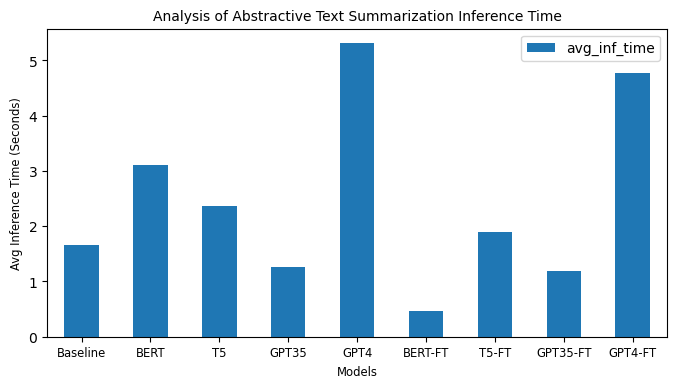

In [25]:
duration_df = pd.read_csv('./output/abs-ts-duration-final.csv')
ax = duration_df.plot(kind = 'bar', x = 'models', y = 'avg_inf_time', figsize=(8,4))
ax.set_xticklabels(labels = duration_df['models'], rotation='horizontal', fontsize='small')
ax.set_xlabel("Models", fontsize='small')
ax.set_ylabel("Avg Inference Time (Seconds)", fontsize='small')
ax.set_title("Analysis of Abstractive Text Summarization Inference Time", fontsize='medium')

In [26]:
viz_df = pd.read_csv(file_path)
viz_df.head(20)

,Unnamed: 0,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
0,baseline-abs,0.208945,0.030051,0.121998,0.121998,0.395355,0.050284,0.665496,0.644331,0.654606
1,bert-base-abs-zs,0.422687,0.169028,0.188297,0.188297,2.960795,0.332223,0.714070,0.826855,0.765737
2,t5-small-abs-zs,0.617004,0.209494,0.248040,0.248040,9.411781,0.257914,0.801183,0.800225,0.800387
3,gpt-3.5-abs-zs,0.601727,0.210212,0.241927,0.241927,11.482069,0.288816,0.796604,0.784998,0.790122
4,gpt-4-abs-zs,0.564998,0.173951,0.220246,0.220246,9.407734,0.252180,0.784203,0.776363,0.779572
5,bert-base-abs-ft,0.617559,0.229780,0.268940,0.268940,7.060130,0.354588,0.815150,0.828461,0.821388
6,t5-small-abs-ft,0.615706,0.221590,0.268209,0.268209,10.625307,0.336868,0.815280,0.820871,0.817652
7,gpt-3.5-abs-ft,0.604626,0.205961,0.239268,0.239268,11.204806,0.286299,0.793312,0.781033,0.786428
8,gpt-4-abs-ft,0.562147,0.166703,0.212299,0.212299,7.853371,0.251420,0.784920,0.778243,0.780958


### Visualization of scores

In [27]:
cats = ['Baseline', 'BERT', 'T5', 'GPT3.5','GPT4', 'BERT-FT', 'T5-FT', 'GPT3.5-FT','GPT4-FT']

In [28]:
df1 = viz_df[['Unnamed: 0','rouge1', 'rouge2' ,'rougeL']]
df2 = viz_df[['Unnamed: 0','bertscore_precision', 'bertscore_recall' ,'bertscore_F1']]
df3 = viz_df[['Unnamed: 0','sacrebleu']]
df4 = viz_df[['Unnamed: 0','meteor']]

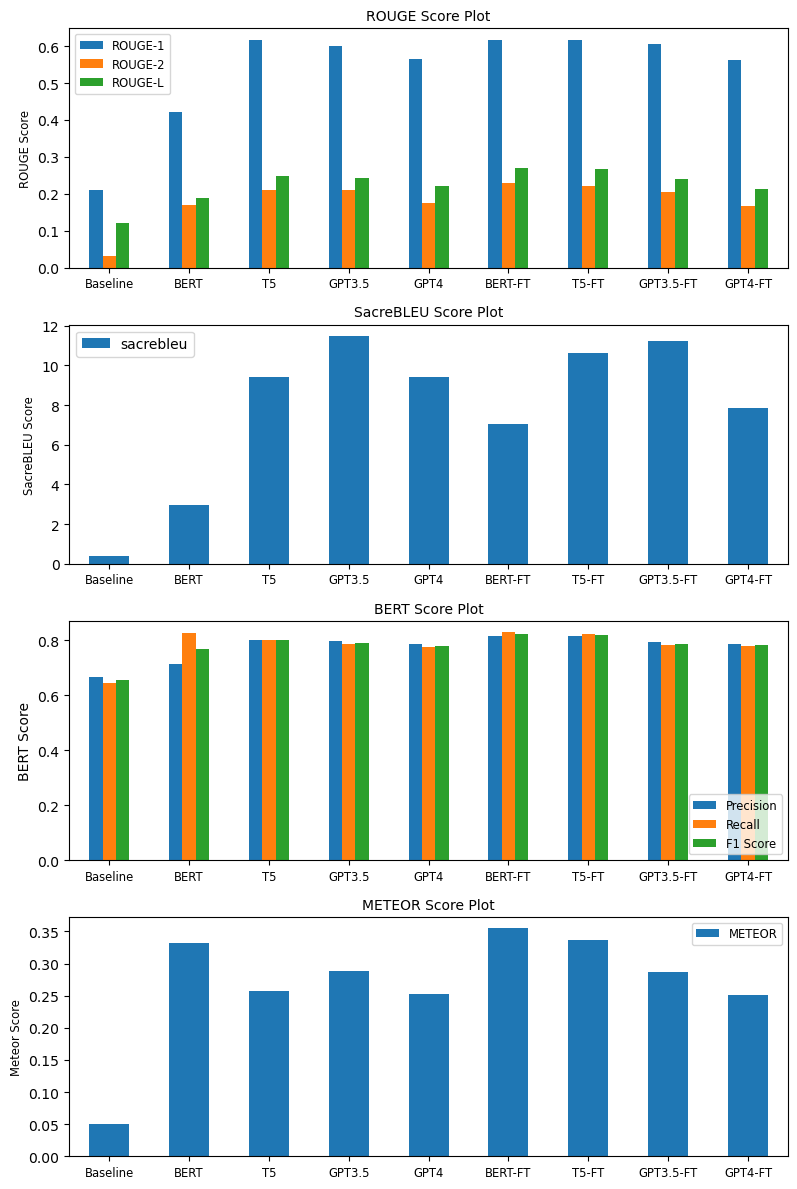

In [29]:
# Creating a 1x4 subplot grid with specified widths
fig, axs = plt.subplots(4, figsize=(8, 12))

# First subplot (row 0, column 0) taking 60% of width
df1.plot(kind='bar', ax = axs[0])
axs[0].set_title('ROUGE Score Plot', fontsize='medium')
#axs[0].set_xlabel('Models')
axs[0].set_ylabel('ROUGE Score',fontsize='small')
axs[0].legend(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'],fontsize='small')
axs[0].set_xticks([0,1,2,3,4,5,6,7,8])
axs[0].set_xticklabels(cats,rotation='horizontal', fontsize='small')

# Second subplot (row 0, column 1)
df3.plot(kind='bar', ax = axs[1])
axs[1].set_title('SacreBLEU Score Plot',fontsize='medium')
#axs[1].set_xlabel('Models')
axs[1].set_ylabel('SacreBLEU Score',fontsize='small')
axs[1].set_xticks([0,1,2,3,4,5,6,7,8])
axs[1].set_xticklabels(cats,rotation='horizontal', fontsize='small')

# Third subplot (row 1, column 0) taking 60% of width
#axs[1, 0].plot(x, y1, color='green')
df2.plot(kind='bar', ax = axs[2])
axs[2].set_title('BERT Score Plot',fontsize='medium')
#axs[2].set_xlabel('Models')
axs[2].set_ylabel('BERT Score')
axs[2].legend(['Precision','Recall','F1 Score'], fontsize='small', loc = 'lower right')
axs[2].set_xticks([0,1,2,3,4,5,6,7,8])
axs[2].set_xticklabels(cats,rotation='horizontal', fontsize='small')
#loc = 'upper right'
# Fourth subplot (row 1, column 1)
df4.plot(kind='bar', ax = axs[3])
axs[3].set_title('METEOR Score Plot',fontsize='medium')
#axs[3].set_xlabel('Models')
axs[3].set_ylabel('Meteor Score',fontsize='small')
axs[3].set_xticks([0,1,2,3,4,5,6,7,8])
axs[3].set_xticklabels(cats,rotation='horizontal', fontsize='small')
axs[3].legend(['METEOR'], fontsize='small', loc = 'upper right')
# Adjust layout
plt.tight_layout()

#plt.title("METRICS")
# Show plot
plt.show()



# Analysis of Hybrid Text Summarization

In [30]:
# Load the extractive text summaries (saved earlier)
df = pd.read_csv('./output/hyb-ts-final.csv')

In [31]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,id,highlights,article,baseline-hyb,bert-hyb,t5-hyb,article_len,highlights_len,gpt35-hyb,gpt4-hyb
0,0,0,92c514c913c0bdfe25341af9fd72b29db544099b,Experts question if packed out planes are put...,Ever noticed how plane seats appear to be gett...,ever noticed how plane seats appear to be gett...,the department of transportation is happy to s...,The shrinking space on aeroplanes is not only ...,374,36,Experts are concerned that the shrinking space...,Experts are raising concerns that the decreasi...
1,1,1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,Drunk teenage boy climbed into lion enclosure ...,A drunk teenage boy had to be rescued by secur...,a drunk teenage boy had to be rescued by secur...,rahul kumar jumped into a lions enclosure at a...,Rahul Kumar 17 climbed over the enclosure fenc...,317,38,NaN,"A drunk teenager, Rahul Kumar, was rescued by ..."
2,2,2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Nottingham Forest are close to extending Dougi...,Dougie Freedman is on the verge of agreeing a ...,dougie freedman is on the verge of agreeing a ...,dougie freedman is set to sign a new two year ...,Dougie Freedman is set to sign a new two year ...,114,35,Dougie Freedman is set to sign a new two-year ...,Dougie Freedman is close to signing a new two-...


### ROUGE score computation

In [32]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
models = ['baseline-hyb', 'bert-hyb','t5-hyb', 'gpt35-hyb','gpt4-hyb']

records = []

for model_name in models:
    rouge_metric.add(prediction = df[model_name], reference = df['highlights'])
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].high.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

metrics_df = pd.DataFrame.from_records(records, index = models )
metrics_df

rouge_dict  {'rouge1': 0.42368332774236833, 'rouge2': 0.16260344441959293, 'rougeL': 0.18439002571843896, 'rougeLsum': 0.18439002571843896}
rouge_dict  {'rouge1': 0.6060431100846806, 'rouge2': 0.2142444658325313, 'rougeL': 0.2526943802925327, 'rougeLsum': 0.2526943802925327}
rouge_dict  {'rouge1': 0.582275505406676, 'rouge2': 0.20691276745826473, 'rougeL': 0.24800188058298075, 'rougeLsum': 0.24800188058298075}
rouge_dict  {'rouge1': 0.5904034896401309, 'rouge2': 0.1961169284467714, 'rougeL': 0.22966194111232283, 'rougeLsum': 0.22966194111232283}
rouge_dict  {'rouge1': 0.5550195267631519, 'rouge2': 0.16613051470588236, 'rougeL': 0.21341603491844702, 'rougeLsum': 0.21341603491844702}


,rouge1,rouge2,rougeL,rougeLsum
baseline-hyb,0.423683,0.162603,0.184390,0.184390
bert-hyb,0.606043,0.214244,0.252694,0.252694
t5-hyb,0.582276,0.206913,0.248002,0.248002
gpt35-hyb,0.590403,0.196117,0.229662,0.229662
gpt4-hyb,0.555020,0.166131,0.213416,0.213416


### BLEU Score computation

In [33]:
scores = []
sacrebleu = load_metric('sacrebleu')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = sacrebleu.compute(predictions=[predictions], references=[references])
    scores.append(result['score'])

metrics_df['sacrebleu'] = scores
metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu
baseline-hyb,0.423683,0.162603,0.184390,0.184390,2.979835
bert-hyb,0.606043,0.214244,0.252694,0.252694,7.326456
t5-hyb,0.582276,0.206913,0.248002,0.248002,12.306689
gpt35-hyb,0.590403,0.196117,0.229662,0.229662,10.464920
gpt4-hyb,0.555020,0.166131,0.213416,0.213416,8.631542


### METEOR Score computation

In [34]:
#models = ['baseline-zs-ets', 'bert-base-ext-zs','bert-base-ext-zs','t5-small-ext-zs', 'gpt-3.5-ext-zs','gpt-4-ext-zs']
scores = []
meteor = load_metric('meteor')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    score = meteor.compute(predictions=predictions, references=references)
    scores.append(score['meteor'])

metrics_df['meteor'] = scores
metrics_df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor
baseline-hyb,0.423683,0.162603,0.184390,0.184390,2.979835,0.326014
bert-hyb,0.606043,0.214244,0.252694,0.252694,7.326456,0.310986
t5-hyb,0.582276,0.206913,0.248002,0.248002,12.306689,0.257783
gpt35-hyb,0.590403,0.196117,0.229662,0.229662,10.464920,0.269180
gpt4-hyb,0.555020,0.166131,0.213416,0.213416,8.631542,0.241702


### BERTScore computation

In [35]:
bertscore_precision = []
bertscore_recall = []
bertscore_F1 = []


bertscore = load_metric('bertscore')

for model_name in models:
    predictions = df[model_name]
    references = df['highlights']
    result = bertscore.compute(predictions=predictions, references=references, lang="en", 
                               model_type="distilbert-base-uncased")

    bertscore_precision.append(np.mean(result['precision']))
    bertscore_recall.append(np.mean(result['recall']))
    bertscore_F1.append(np.mean(result['f1']))
        
metrics_df['bertscore_precision'] = bertscore_precision
metrics_df['bertscore_recall'] = bertscore_recall
metrics_df['bertscore_F1'] = bertscore_F1

metrics_df

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
baseline-hyb,0.423683,0.162603,0.184390,0.184390,2.979835,0.326014,0.713373,0.821227,0.762964
bert-hyb,0.606043,0.214244,0.252694,0.252694,7.326456,0.310986,0.810397,0.808216,0.808952
t5-hyb,0.582276,0.206913,0.248002,0.248002,12.306689,0.257783,0.825157,0.794366,0.809048
gpt35-hyb,0.590403,0.196117,0.229662,0.229662,10.464920,0.269180,0.795282,0.780685,0.787376
gpt4-hyb,0.555020,0.166131,0.213416,0.213416,8.631542,0.241702,0.796106,0.779145,0.786982


In [36]:
file_path = './output/hyb_ts_eval_metrics_final.csv'
print("Evaluation will be saved in this file : ", file_path)
metrics_df.to_csv(file_path)

Evaluation will be saved in this file :  ./output/hyb_ts_eval_metrics_final.csv


Text(0.5, 1.0, 'Analysis of Hybrid Text Summarization Inference Time')

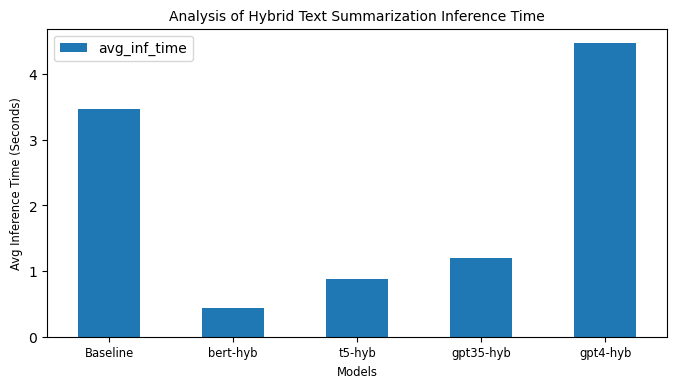

In [37]:
duration_df = pd.read_csv('./output/hyb-ts-duration-final.csv')
ax = duration_df.plot(kind = 'bar', x = 'models', y = 'avg_inf_time', figsize=(8,4))
ax.set_xticklabels(labels = duration_df['models'], rotation='horizontal', fontsize='small')
ax.set_xlabel("Models", fontsize='small')
ax.set_ylabel("Avg Inference Time (Seconds)", fontsize='small')
ax.set_title("Analysis of Hybrid Text Summarization Inference Time", fontsize='medium')

In [38]:
viz_df = pd.read_csv(file_path)
viz_df.head(10)

,Unnamed: 0,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore_precision,bertscore_recall,bertscore_F1
0,baseline-hyb,0.423683,0.162603,0.184390,0.184390,2.979835,0.326014,0.713373,0.821227,0.762964
1,bert-hyb,0.606043,0.214244,0.252694,0.252694,7.326456,0.310986,0.810397,0.808216,0.808952
2,t5-hyb,0.582276,0.206913,0.248002,0.248002,12.306689,0.257783,0.825157,0.794366,0.809048
3,gpt35-hyb,0.590403,0.196117,0.229662,0.229662,10.464920,0.269180,0.795282,0.780685,0.787376
4,gpt4-hyb,0.555020,0.166131,0.213416,0.213416,8.631542,0.241702,0.796106,0.779145,0.786982


In [39]:
cats = ['Baseline-Hyb', 'BERT-Hyb','T5-Hyb', 'GPT35-Hyb','GPT4-Hyb']


In [40]:
df1 = viz_df[['Unnamed: 0','rouge1', 'rouge2' ,'rougeL']]
df2 = viz_df[['Unnamed: 0','bertscore_precision', 'bertscore_recall' ,'bertscore_F1']]
df3 = viz_df[['Unnamed: 0','sacrebleu']]
df4 = viz_df[['Unnamed: 0','meteor']]

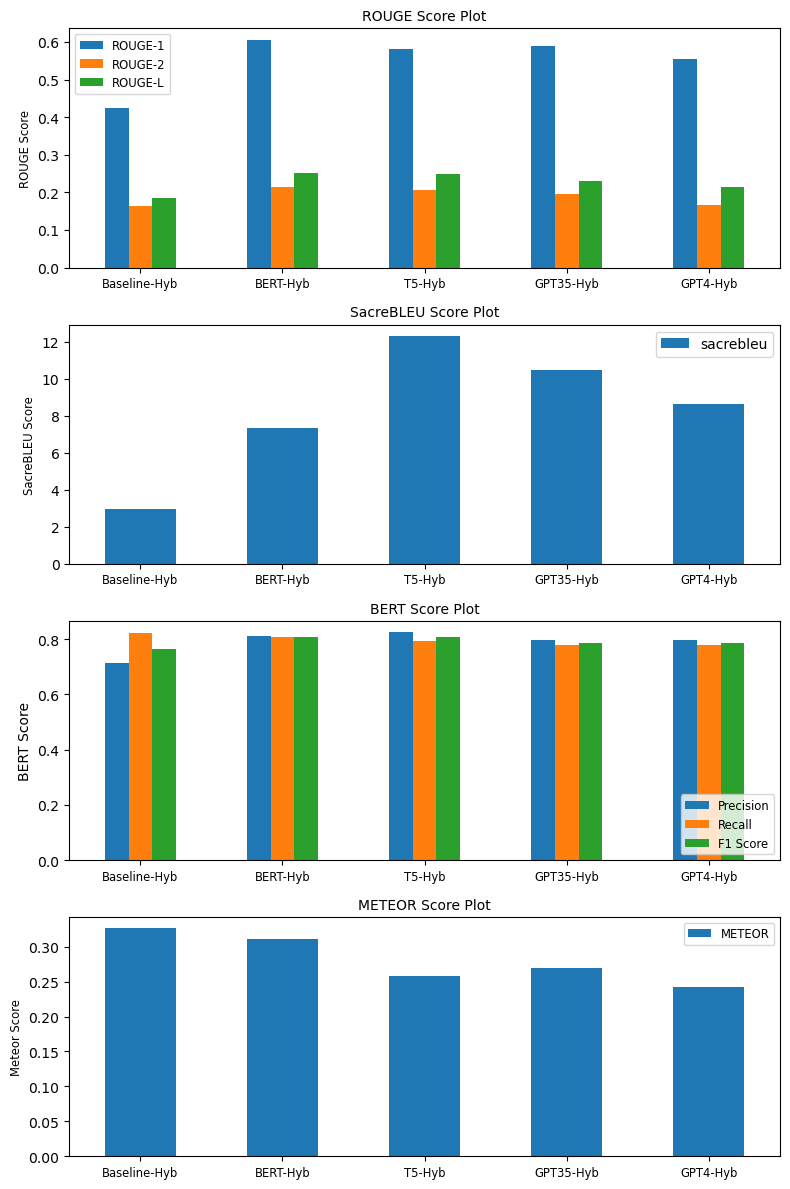

In [41]:
# Creating a 1x4 subplot grid with specified widths
fig, axs = plt.subplots(4, figsize=(8, 12))

# First subplot (row 0, column 0) taking 60% of width
df1.plot(kind='bar', ax = axs[0])
axs[0].set_title('ROUGE Score Plot', fontsize='medium')
#axs[0].set_xlabel('Models')
axs[0].set_ylabel('ROUGE Score',fontsize='small')
axs[0].legend(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'],fontsize='small')
axs[0].set_xticks([0,1,2,3,4])
axs[0].set_xticklabels(cats,rotation='horizontal', fontsize='small')

# Second subplot (row 0, column 1)
df3.plot(kind='bar', ax = axs[1])
axs[1].set_title('SacreBLEU Score Plot',fontsize='medium')
#axs[1].set_xlabel('Models')
axs[1].set_ylabel('SacreBLEU Score',fontsize='small')
axs[1].set_xticks([0,1,2,3,4])
axs[1].set_xticklabels(cats,rotation='horizontal', fontsize='small')

# Third subplot (row 1, column 0) taking 60% of width
#axs[1, 0].plot(x, y1, color='green')
df2.plot(kind='bar', ax = axs[2])
axs[2].set_title('BERT Score Plot',fontsize='medium')
#axs[2].set_xlabel('Models')
axs[2].set_ylabel('BERT Score')
axs[2].legend(['Precision','Recall','F1 Score'], fontsize='small', loc = 'lower right')
axs[2].set_xticks([0,1,2,3,4])
axs[2].set_xticklabels(cats,rotation='horizontal', fontsize='small')
#loc = 'upper right'
# Fourth subplot (row 1, column 1)
df4.plot(kind='bar', ax = axs[3])
axs[3].set_title('METEOR Score Plot',fontsize='medium')
#axs[3].set_xlabel('Models')
axs[3].set_ylabel('Meteor Score',fontsize='small')
axs[3].set_xticks([0,1,2,3,4])
axs[3].set_xticklabels(cats,rotation='horizontal', fontsize='small')
axs[3].legend(['METEOR'], fontsize='small', loc = 'upper right')
# Adjust layout
plt.tight_layout()

#plt.title("METRICS")
# Show plot
plt.show()

